# Aula 9 - Naive Bayes

No classificador Naive Bayes, podemos assumir que os atributos são normalmente distribuídos.

In [3]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data = pd.read_csv('data/vertebralcolumn-3C.csv', header=(0))
data = pd.read_csv('/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/iris.csv', header=(0))

data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns)
data.head(10)

Número de linhas e colunas na matriz de atributos: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

In [5]:
from sklearn.model_selection import train_test_split
p = 0.7 # fracao de elementos no conjunto de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

# Classificação: implementação do método
Inicialmente, definimos uma função para calcular a densidade de probabilidade conjunta:

$p(\vec x| C_i) = \prod_{j = 1}^{d} p(x_j| C_i), \;\; i = 1,2,...,k$

onde $C_i$ são as classes. Se a distribuição for normal, temos que cada atributo $X_j$ tem a seguinte função densidade de probabilidade associada, para cada classe:

$p(x_j|C_i) = \frac{1}{\sqrt(2 \pi \sigma C_i)} exp [- \frac{1}{2} (\frac{x_j - \mu C_i}{\sigma C_i})^{2}], \;\; i = 1,2, ..., k$

Assim, definimos uma função para calcular a função de verossimilhança.



In [6]:
def likelyhood(y, Z):
    def gaussian(x, mu, sig):
        p = (1/np.sqrt(2*np.pi*sig))*np.exp((-1/2)*((x-mu)/sig)**2)
        return p 
    lk = 1
    for j in np.arange(0, Z.shape[1]):
        m = np.mean(Z[:,j])
        s = np.std(Z[:,j])      
        lk = lk*gaussian(y[j], m, s)
    return lk

A seguir, realizamos a estimação para cada classe:

In [21]:
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Z = X_train[elements,:][0]
    for j in np.arange(0,X_test.shape[0]):
        x = X_test[j,:]
        pj = likelyhood(x,Z)
        priori = len(elements[0])/X_train.shape[0]
        P[classes[i]][j] = pj*priori


Para as observações no conjunto de teste, a probabilidade pertencer a cada classe:

In [22]:
P.head(10)

,setosa,versicolor,virginica
0,2.871961e-89,3.351703e-02,2.160716e-04
1,2.601053e-03,9.033699e-16,2.194147e-22
2,1.061333e-285,2.340403e-16,1.243290e-04
3,2.533670e-92,3.051590e-02,1.129254e-03
4,3.861668e-105,6.081800e-03,1.763450e-03
5,2.347211e-02,4.027177e-14,6.096421e-22
6,2.496103e-52,2.438361e-02,1.262370e-06
7,8.921024e-171,5.184283e-09,1.746005e-02
8,5.313623e-95,6.339671e-03,5.880238e-05
9,1.238407e-58,5.117783e-02,3.460441e-06


In [23]:
from sklearn.metrics import accuracy_score

y_pred = []
for i in np.arange(0, P.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(P.columns[c])
y_pred = np.array(y_pred, dtype=str)

score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.9777777777777777


# Classificação: usando a biblioteca scikit-learn
Podemos realizar a classificação usando a função disponível na biblioteca scikit-learn.

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.9777777777777777


Outra maneira de efetuarmos a classificação é assumirmos que os atributos possuem distribuição diferente da normal.

Uma possibilidade é assumirmos que os dados possuem distribuição de Bernoulli.



In [26]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.28888888888888886


Código completo.

In [28]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

random.seed(42) 

data = pd.read_csv('/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/iris.csv', header=(0))

classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

# Converte para matriz e vetor do numpy
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Transforma os dados para terem media igual a zero e variancia igual a 1
#scaler = StandardScaler().fit(X)
#X = scaler.transform(X)

# Seleciona os conjuntos de treinamento e teste
p = 0.8 # fraction of elements in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = p, random_state = 42)

# ajusta o classificador Naive-Bayes de acordo com os dados
model = GaussianNB()
model.fit(X_train, y_train)
# realiza a predicao
y_pred = model.predict(X_test)
# calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 1.0


# Região de decisão
Selecionando dois atributos, podemos visualizar a região de decisão. Para graficar a região de separação, precisamos instalar a bibliteca mlxtend: http://rasbt.github.io/mlxtend/installation/
Pode ser usado: conda install -c conda-forge mlxtend

Para o classificador Naive Bayes:

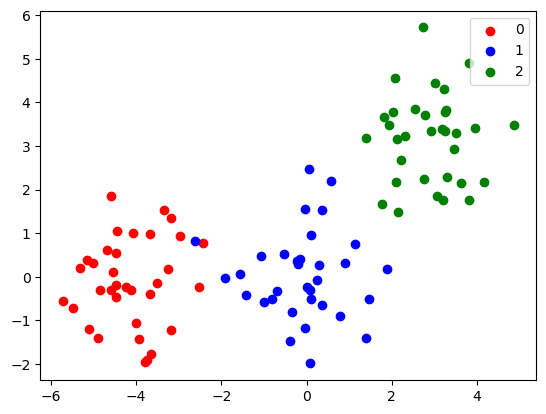

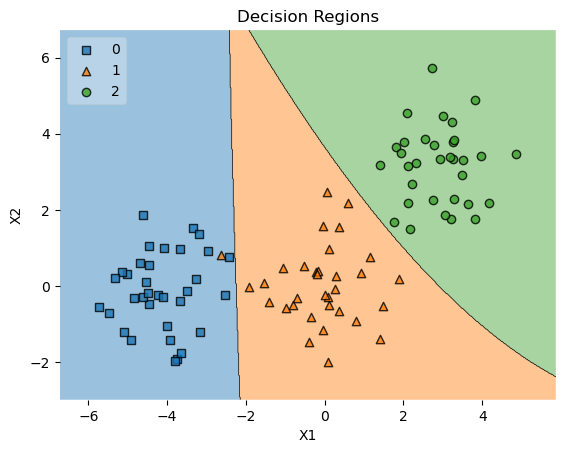

In [29]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame

# Gera os dados em duas dimensões
n_samples = 100 # número de observações
# centro dos grupos
centers = [(-4, 0), (0, 0), (3, 3)]
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB


# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

# Training a classifier
model = GaussianNB()
model.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()